# Optional Lab: Model Representation

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:800px;height:300px;">
</figure>

## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

| Notation | Description | Python |
|----------|------------|--------|
| $a$ | scalar, non bold | |
| $\mathbf{a}$ | vector, bold | |
| **Regression** |  |  |
| $\mathbf{x}$ | Training example feature values (house size) | `x_train` |
| $\mathbf{y}$ | Training example targets (house price) | `y_train` |
| $x^{(i)}, y^{(i)}$ | i-th training example | `x_i`, `y_i` |
| $m$ | Number of training examples | `m` |
| $w$ | Weight parameter | `w` |
| $b$ | Bias parameter | `b` |
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Problem Statement
As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

<img src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:580px; padding: 10px;  " /> 

Please run the following code cell to create your x_train and y_train variables. The data is stored in one-dimensional NumPy arrays.

In [10]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)

x_train = np.array([1.0, 2.0])
y_train = np.array([300, 500])
print(x_train)
print(y_train)

[1. 2.]
[300 500]


### Number of training examples `m`

In [13]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


Can also use len()

In [16]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

In [18]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

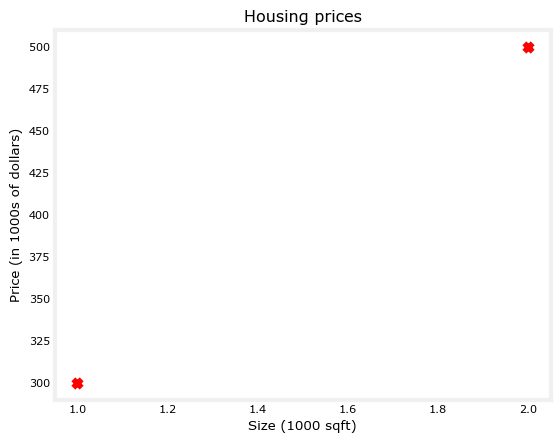

In [19]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title('Housing prices')
# Set the y-axis table
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function

As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 


<img src="./images/C1_W1_L3_S1_model.png"     style=" width:480px; padding: 10px; " >

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [20]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   

In [21]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = (w * x[i]) + b

    return f_wb      

Now let's call the compute_model_output function and plot the output..

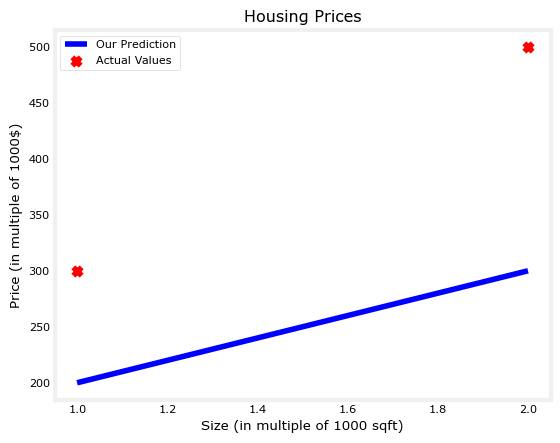

In [22]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title('Housing Prices')
# Set the y-axis label
plt.ylabel('Price (in multiple of 1000$)')
# Set the x-axis label
plt.xlabel('Size (in multiple of 1000 sqft)')
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

### Answer:
Use the linear function equation $y = mx + c$ that we studied in algebra

We have two training data (x_i, y_i), which will act as coefficients, Using those two points, we can calculate slope (m) and then c 

lets substitute training values in the linear equation

1. $300 = m (1) + c$
2. $500 = m (2) + c$

subtracting 1st from other gives, $m=200$

substituting $m=200$ in any of the above equation gives $c=100$

in the model we can use $slope(m)$ value as $w$ and $intercept(c)$ as $b$

Lets check once again with the updated w and b values

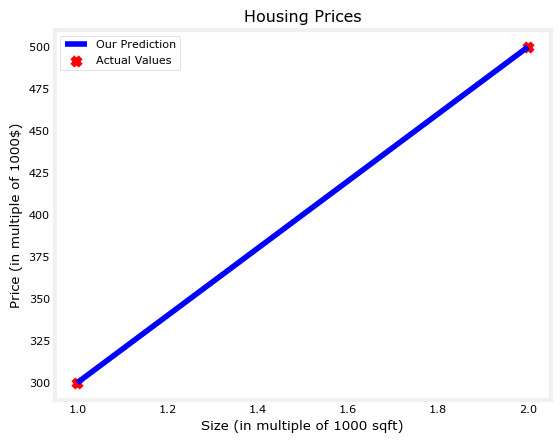

In [24]:
w = 200
b = 100

tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title('Housing Prices')
# Set the y-axis label
plt.ylabel('Price (in multiple of 1000$)')
# Set the x-axis label
plt.xlabel('Size (in multiple of 1000 sqft)')
plt.legend()
plt.show()

Now as the line can fit our training dataset perfectly, we have the perfect model

We can predict the price for different house sizes, lets try for the size 1.6k sqft

In [28]:
w = 200
b = 100
x_i = 1.6
cost_1600sqft = w * x_i + b
print('cost of 1600 sqft house - $', cost_1600sqft, 'thousand')

cost of 1600 sqft house - $ 420.0 thousand


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.